# PROBLEM STATEMENT

You are working as a car salesman and you would like to develop a model to predict the total dollar amount that customers are willing to pay given the following attributes: 
- Customer Name
- Customer e-mail
- Country
- Gender
- Age
- Annual Salary 
- Credit Card Debt 
- Net Worth 

The model should predict: 
- Car Purchase Amount 

In [90]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
#import dataset
car_df = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')
car_df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


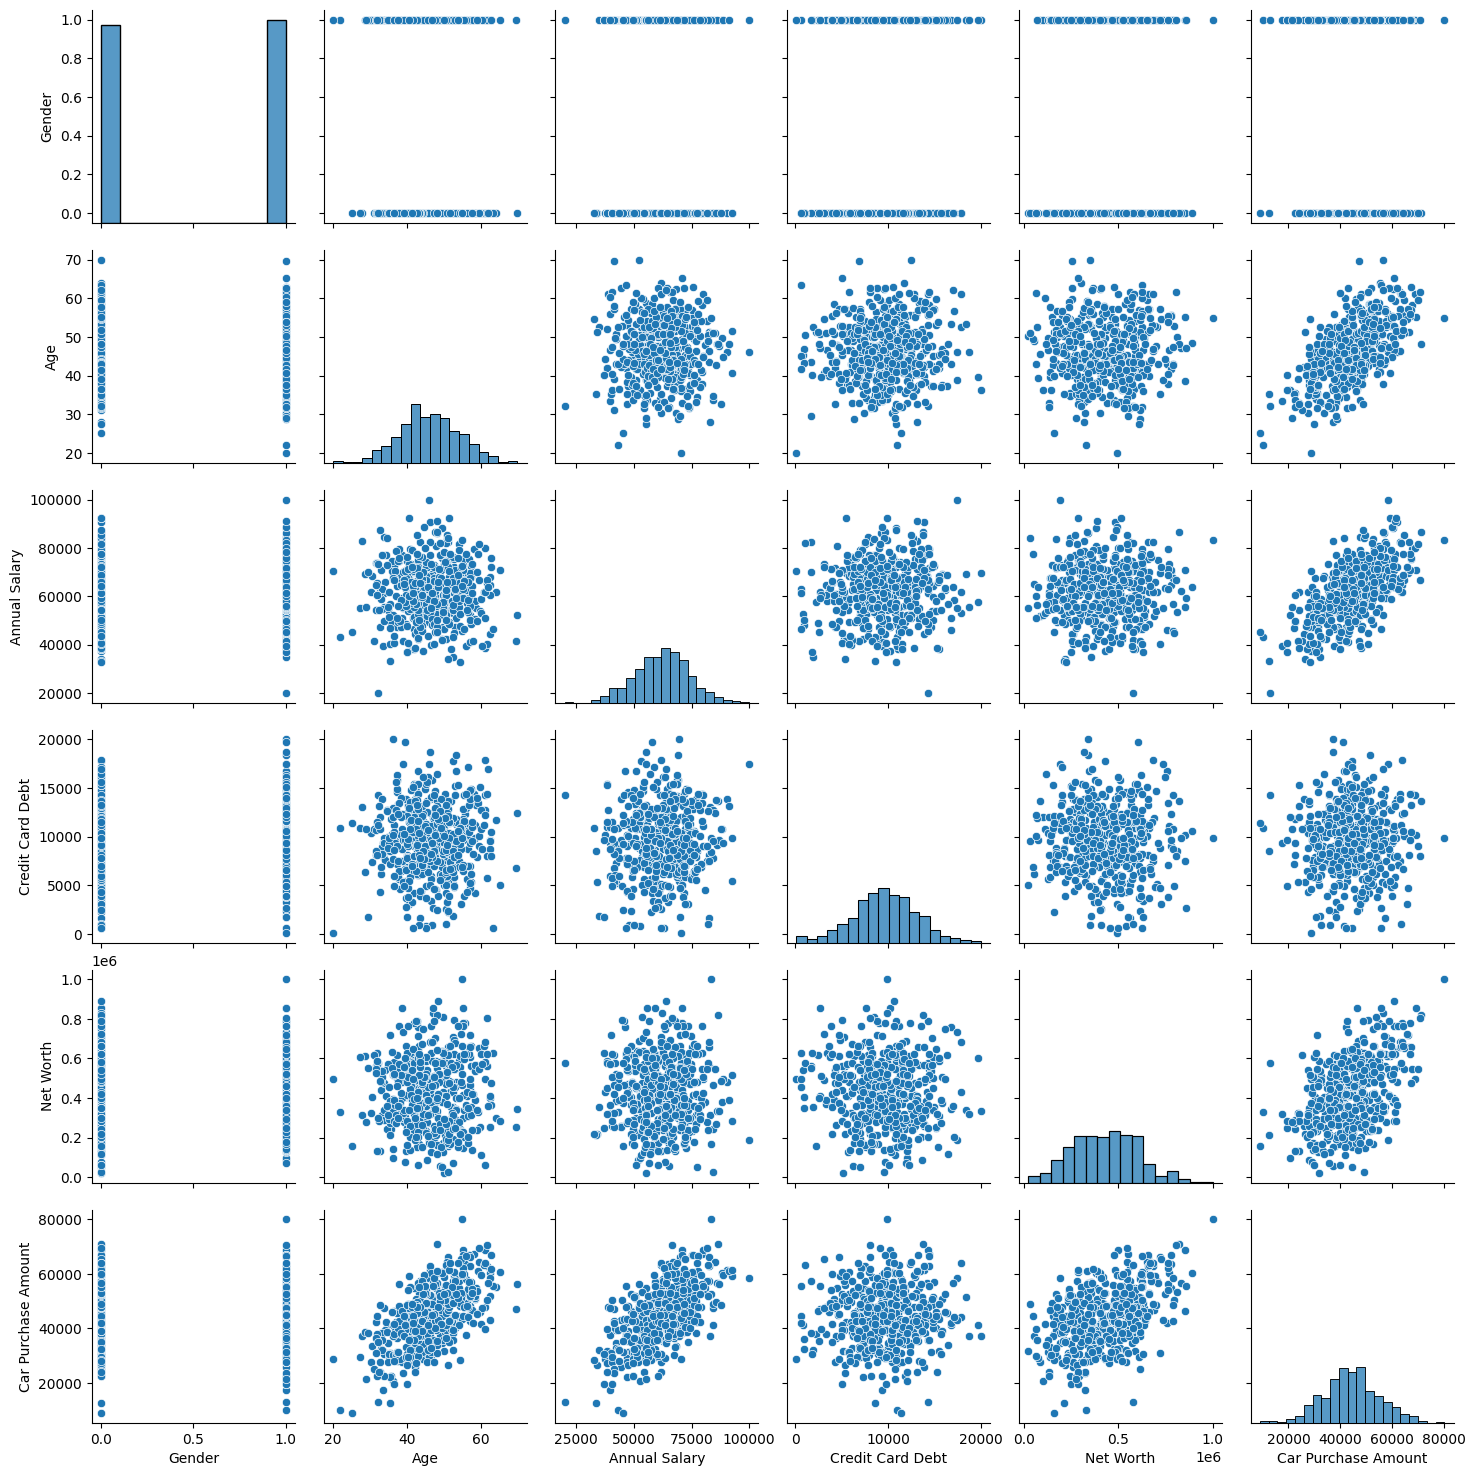

In [92]:
#plotting the dataset
sns.pairplot(car_df)

<AxesSubplot: xlabel='Annual Salary', ylabel='Car Purchase Amount'>

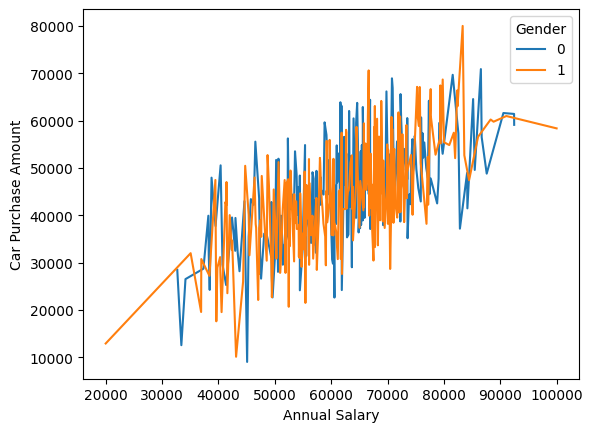

In [93]:
sns.lineplot(data=car_df, x='Annual Salary', y='Car Purchase Amount', hue='Gender')

<AxesSubplot: xlabel='Age', ylabel='Car Purchase Amount'>

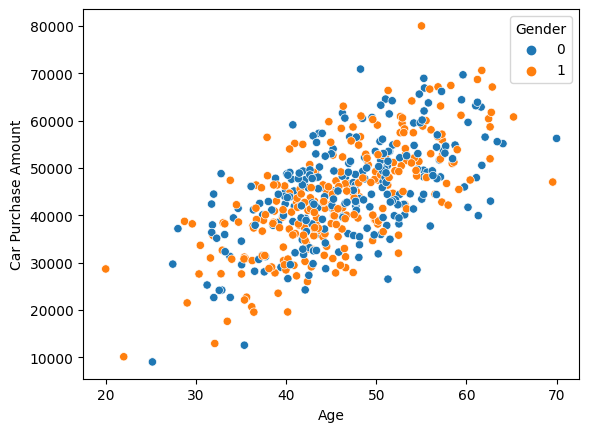

In [94]:
sns.scatterplot(data=car_df, x='Age', y='Car Purchase Amount', hue='Gender')

<AxesSubplot: xlabel='Gender', ylabel='Car Purchase Amount'>

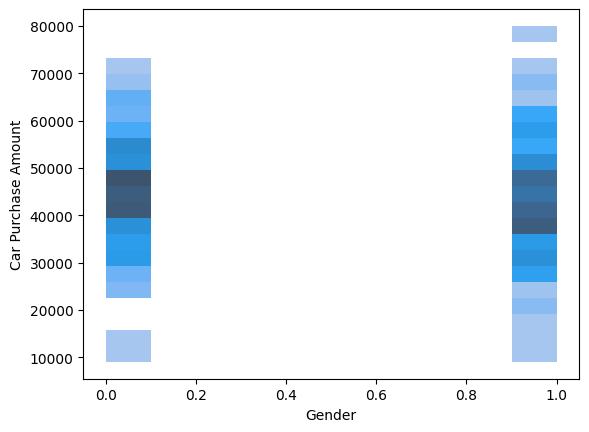

In [95]:
sns.histplot(data=car_df, x='Gender', y='Car Purchase Amount')

In [96]:
#cleaning data
car_df.Country.nunique()

# since the column Country has 211 we won't be using it to train our model

211

In [97]:
#creating training and testing dataset
X = car_df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)
y = car_df['Car Purchase Amount']
y.shape


(500,)

In [98]:
#scaling the data using min-max scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [99]:
scaler.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [100]:
scaler.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [101]:
print(X_scaled[:,0])

[0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1.

In [102]:
y.shape

(500,)

In [103]:
y = y.values.reshape(-1,1)

In [104]:
y.shape

(500, 1)

In [105]:
y_scaled = scaler.fit_transform(y)


In [106]:
y_scaled

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

In [107]:
#training the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25,random_state=101)

In [108]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(25, input_dim=5, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))


In [109]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 25)                150       
                                                                 
 dense_7 (Dense)             (None, 25)                650       
                                                                 
 dense_8 (Dense)             (None, 1)                 26        
                                                                 
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [110]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [111]:
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=100,  verbose=1, validation_split=0.25)


Epoch 1/100
3/3 [==============================] - 1s 78ms/step - loss: 0.5632 - val_loss: 0.4898
Epoch 2/100
3/3 [==============================] - 0s 19ms/step - loss: 0.4538 - val_loss: 0.3914
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 0.3571 - val_loss: 0.3042
Epoch 4/100
3/3 [==============================] - 0s 18ms/step - loss: 0.2742 - val_loss: 0.2276
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 0.2000 - val_loss: 0.1630
Epoch 6/100
3/3 [==============================] - 0s 18ms/step - loss: 0.1388 - val_loss: 0.1110
Epoch 7/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0923 - val_loss: 0.0717
Epoch 8/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0595 - val_loss: 0.0457
Epoch 9/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0385 - val_loss: 0.0315
Epoch 10/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0288 - val_loss: 0.0263
Epoch 11/100
3/3 [=

In [112]:
#evaluating the model
# print(epochs_hist.history.keys())
# print(epochs_hist.history)

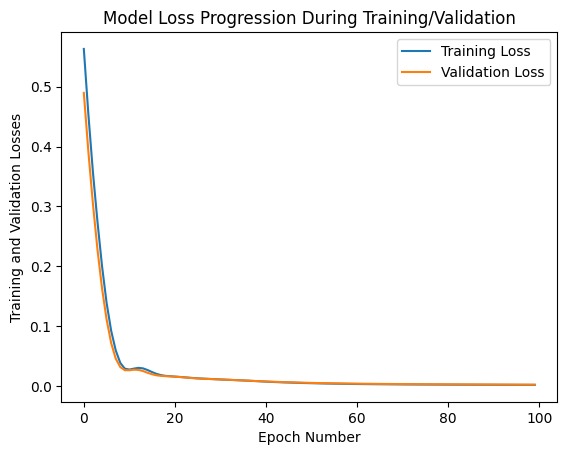

In [113]:
#plot to check the progress of the model
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])


In [114]:
#testing the model on the test set
y_predict = model.predict(X_test)
y_predict.shape

4/4 [==============================] - 0s 2ms/step


(125, 1)

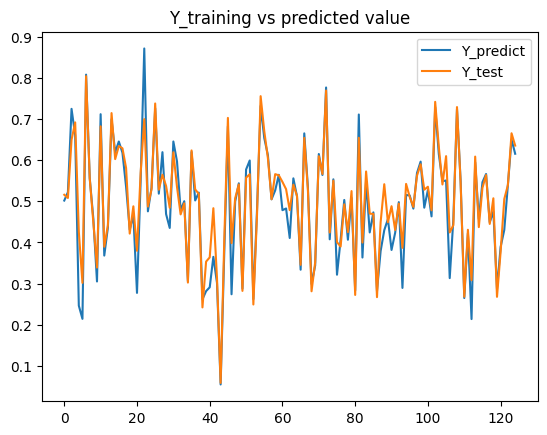

In [116]:
#ploting y_test vs y_predicted
plt.plot(y_test)
plt.plot(y_predict)


plt.title('Y_training vs predicted value')

plt.legend(['Y_predict', 'Y_test'])

As we can see, our model did pretty well, the predicted value is almost the same as the tested value. The model is however underfitted can be made a little better, by taking more training data and attributes